In [1]:
#libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline
import seaborn as sns
import datetime as date_time

In [2]:
#dataset
df = pd.read_csv('C:/Users/Kaytie/Desktop/project_data.csv')

In [3]:
df.head(5)

,Slot.ID,Placement,Ad.Slot.Page.Layout,Creative.ID,Content.Type,Content.Has.Play.Button,Date,Device,Size,Publisher.Split,Impressions,Referrals,Conversions
0,1,NaN,NaN,1,advertorial,yes,12/01/2020,Other,Unknown,0.00,0,0,0
1,2,external_in_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.02,10,0,0
2,3,external_above_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.32,94,0,0
3,4,external_below_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.00,54,0,0
4,5,external_below_content,full_article,1,advertorial,yes,12/01/2020,Mobile,Responsive,0.03,21,1,0


In [4]:
#changing column names to easier versions
new_name={'Publisher.Split':'Cost','Conversions':'Profit'}
df.rename(columns=new_name, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484486 entries, 0 to 5484485
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Slot.ID                  int64  
 1   Placement                object 
 2   Ad.Slot.Page.Layout      object 
 3   Creative.ID              int64  
 4   Content.Type             object 
 5   Content.Has.Play.Button  object 
 6   Date                     object 
 7   Device                   object 
 8   Size                     object 
 9   Cost                     float64
 10  Impressions              int64  
 11  Referrals                int64  
 12  Profit                   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 544.0+ MB


In [5]:
#copy of the dataset
df2=df.copy()

In [6]:
df.columns

Index(['Slot.ID', 'Placement', 'Ad.Slot.Page.Layout', 'Creative.ID',
       'Content.Type', 'Content.Has.Play.Button', 'Date', 'Device', 'Size',
       'Cost', 'Impressions', 'Referrals', 'Profit'],
      dtype='object')

In [7]:
#drop all NA values
df2.dropna(inplace=True)

In [8]:
df2['Device'].value_counts()

Mobile     2221583
Desktop    2078603
Tablet     1171566
Other          404
Name: Device, dtype: int64

In [9]:
#Changing dates to standardized format for pandas dataframe
df2['Date']=pd.to_datetime(df2['Date'], dayfirst=False)

In [10]:
df2.tail(1)

,Slot.ID,Placement,Ad.Slot.Page.Layout,Creative.ID,Content.Type,Content.Has.Play.Button,Date,Device,Size,Cost,Impressions,Referrals,Profit
5484482,1239,external_feed,full_article,84,advertorial,yes,2021-02-28,Mobile,IAB 300x250 (Medium Rectangle),0.0,0,0,0


In [11]:
#creating the strings for the masks
start_date35='2020-12-01'
end_date35='2021-01-07'
start_date40='2021-01-08'
end_date40='2021-02-28'

In [12]:
#creating the masks for the filters
mask35=(df2['Date'] >= start_date35) & (df2['Date'] <= end_date35)
mask40=(df2['Date'] >= start_date40) & (df2['Date'] <= end_date40)

In [13]:
#filtering revenue by date
rev35=df2.loc[mask35]
rev40=df2.loc[mask40]

In [14]:
#calculating true profit by filtering the dates before/including 1/7/21 and multiplying the number of conversions against 35, 
#and doing the same to dates including/after 1/8/21 against 40
rev35['Profit']=rev35['Profit']*35
rev40['Profit']=rev40['Profit']*40

<ipython-input-14-a11f496a2354>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev35['Profit']=rev35['Profit']*35
<ipython-input-14-a11f496a2354>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev40['Profit']=rev40['Profit']*40


In [15]:
#true profit dataframe
rr=rev35.append(rev40)

In [16]:
rr.tail(5)

,Slot.ID,Placement,Ad.Slot.Page.Layout,Creative.ID,Content.Type,Content.Has.Play.Button,Date,Device,Size,Cost,Impressions,Referrals,Profit
5484478,1208,external_feed,full_article,84,advertorial,yes,2021-02-28,Mobile,IAB 300x250 (Medium Rectangle),0.0,0,0,0
5484479,1584,external_feed,full_article,84,advertorial,yes,2021-02-28,Mobile,IAB 300x250 (Medium Rectangle),0.0,0,0,0
5484480,1586,external_feed,full_article,84,advertorial,yes,2021-02-28,Mobile,IAB 300x50 (Mobile Banner),0.0,0,0,0
5484481,1590,external_feed,full_article,84,advertorial,yes,2021-02-28,Mobile,IAB 300x250 (Medium Rectangle),0.0,0,0,0
5484482,1239,external_feed,full_article,84,advertorial,yes,2021-02-28,Mobile,IAB 300x250 (Medium Rectangle),0.0,0,0,0


In [20]:
rr['Revenue']=rr['Profit']-rr['Cost']

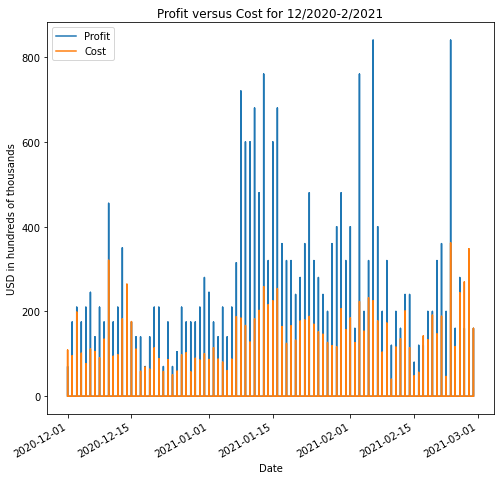

In [19]:
#Visualization of Revenue (Cost vs Profit)
#Costs have been consistently lower than profits on average. 
ax=rr.plot(x='Date', y=['Profit','Cost'],
           title='Profit versus Cost for 12/2020-2/2021',
           ylabel='USD in hundreds of thousands',
           figsize=(8,8))

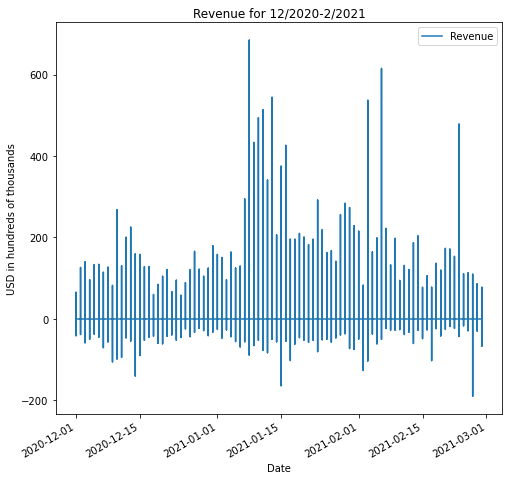

In [21]:
#Visualization of Revenue (Profit-Cost)
#Revenue fluctuates but on average stays higher than zero
ax=rr.plot(x='Date', y=['Revenue'],
           title='Revenue for 12/2020-2/2021',
           ylabel='USD in hundreds of thousands',
           figsize=(8,8))

In [23]:
device_profit=rr.groupby('Device')['Profit'].sum()

In [24]:
device_profit

Device
Desktop    162570
Mobile     461760
Other           0
Tablet      23165
Name: Profit, dtype: int64

In [25]:
#Frequency table for Profit
device2=pd.crosstab(index=rr['Profit'],columns=rr['Device'])
device2dr=device2.drop(labels=0,axis=0)
device2dr

Device,Desktop,Mobile,Other,Tablet
Profit,,,,
35,1113,2139,0,135
40,2189,4710,0,397
70,93,279,0,4
80,176,719,0,15
105,15,73,0,0
120,50,234,0,4
140,6,46,0,0
160,8,112,0,2
175,2,22,0,0


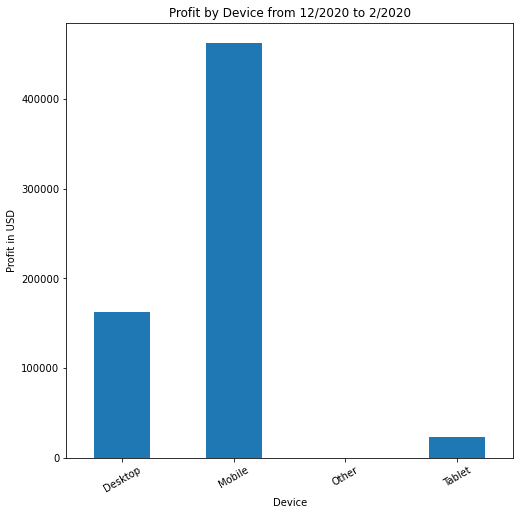

In [26]:
#Visualizing the Profit earned by Device Type
#Mobile is the most popular device
#Other category could be expanded in surveys to access other markets
device_profit.plot(title='Profit by Device from 12/2020 to 2/2020',
               kind='bar',
             xlabel='Device',
             ylabel='Profit in USD',
             figsize=(8,8))
plt.xticks(rotation='30')
ax.legend(frameon=False)

In [27]:
#Dropping columns for creative.id and slot.id dataframes
creative_profit=rr.drop(['Slot.ID','Placement','Ad.Slot.Page.Layout','Content.Type','Content.Has.Play.Button','Date','Device','Size','Cost'],axis=1)
creative_profit.info()
slot_profit=rr.drop(['Creative.ID','Placement','Ad.Slot.Page.Layout','Content.Type','Content.Has.Play.Button','Date','Device','Size','Cost'],axis=1)
slot_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472156 entries, 1 to 5484482
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Creative.ID  int64  
 1   Impressions  int64  
 2   Referrals    int64  
 3   Profit       int64  
 4   Revenue      float64
dtypes: float64(1), int64(4)
memory usage: 250.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472156 entries, 1 to 5484482
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Slot.ID      int64  
 1   Impressions  int64  
 2   Referrals    int64  
 3   Profit       int64  
 4   Revenue      float64
dtypes: float64(1), int64(4)
memory usage: 250.5 MB


In [28]:
#table for the ten Creative.ID with highest profits
#could be used for ideas to solve loss problems with underperforming Creative.ID
creative_profit1=creative_profit.nlargest(10,['Profit'], keep='first')
creative_profit1.name="Creative IDs with the highest Profit"

In [29]:
#table for the ten Creative.ID with the lowest profits, organized second by lowest impressions
#could be areas of resource loss
creative_profit2=creative_profit.nsmallest(10,['Profit', 'Impressions'], keep='first')
creative_profit2.name="Creative IDs with the highest Profit"

In [30]:
#table for ten Slot.ID with the highest profits
#Could be used for ideas to solve loss problems with underperforming Slot.ID
slot_profit1=slot_profit.nlargest(10,['Profit'], keep='first')

In [31]:
#table for the ten Slot.ID with the lowest profit, organized second by lowest impressions
#could be areas of resource loss
slot_profit2=slot_profit.nsmallest(10,['Profit', 'Impressions'], keep='first')

In [32]:
#table for the ten Creative.IDs with the highest referral rate, organized second by impressions
#could be worthwhile areas of resources regardless of profits
creative_referral1=creative_profit.nlargest(10,['Referrals','Impressions'], keep='first')


In [33]:
#table for the ten Slot.ID with the highest referral rate, organized second by impressions
#could be worthwhile areas of resources regardless of profits
slot_referral1=slot_profit.nlargest(10,['Referrals','Impressions'], keep='first')